In [3]:
import pandas as pd
import numpy as np
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


In [5]:
url="https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv"
df=pd.read_csv(url, encoding='utf-8')
df

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.00000,2043200.0,0.000000e+00,0.000000e+00,0.0000,0.000235,0,1.000000,0.000,...,31.781022,0.000000,241,244,41240,244,244,65173.130,36500.0000,0.000000e+00
1,2/18/2010,0.00000,2054650.0,0.000000e+00,0.000000e+00,0.0000,0.000241,0,1.000000,0.000,...,154.463801,0.000000,234,235,41475,235,235,18911.740,7413.0000,0.000000e+00
2,2/19/2010,0.00000,2063600.0,0.000000e+00,0.000000e+00,0.0000,0.000228,0,1.000000,0.000,...,1278.516635,0.000000,185,183,41658,183,183,9749.980,700.0000,0.000000e+00
3,2/20/2010,0.00000,2074700.0,0.000000e+00,0.000000e+00,0.0000,0.000218,0,1.000000,0.000,...,22186.687990,0.000000,224,224,41882,224,224,11150.030,50.0000,0.000000e+00
4,2/21/2010,0.00000,2085400.0,0.000000e+00,0.000000e+00,0.0000,0.000234,0,1.000000,0.000,...,689.179876,0.000000,218,218,42100,218,218,12266.830,1553.0000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,...,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,...,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,...,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,...,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09


In [6]:
df.shape

(2906, 24)

In [7]:
df['btc_market_price'][1023]

13.6888

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

/root/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


<AxesSubplot:>

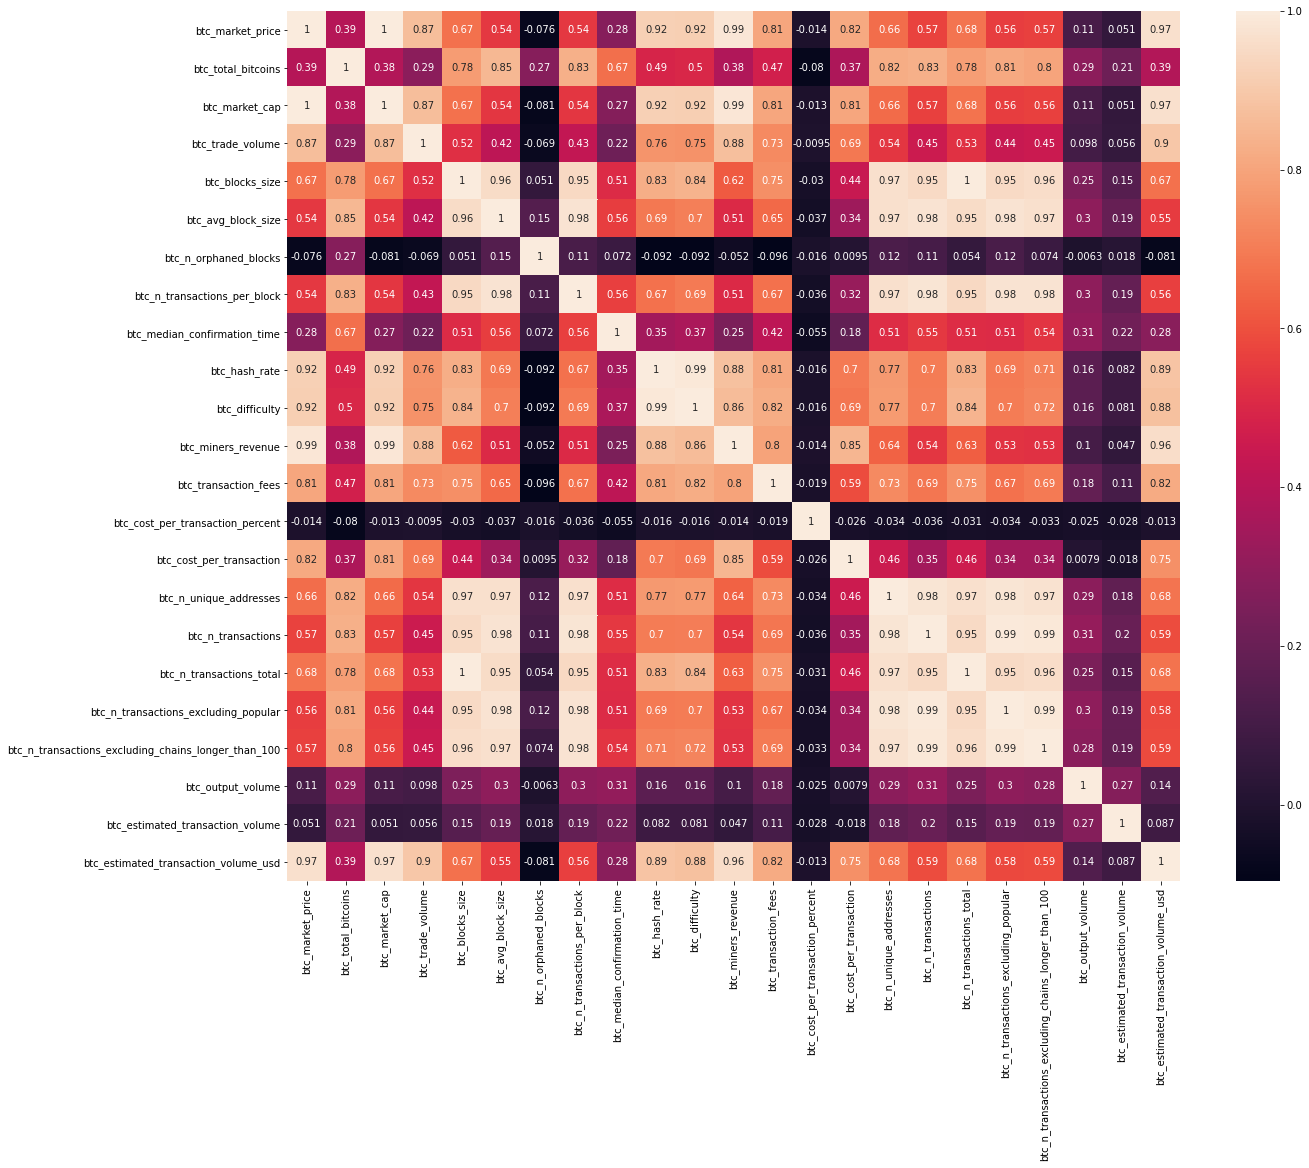

In [15]:
plt.subplots(figsize = (20,16))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='btc_market_price', ylabel='btc_market_cap'>

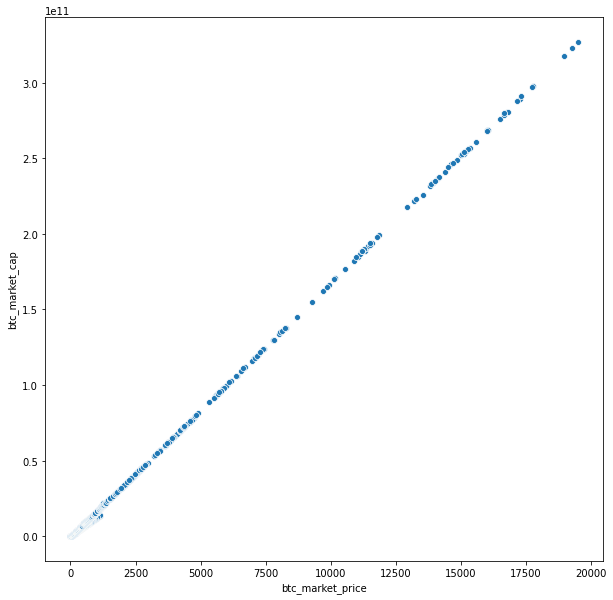

In [23]:
plt.subplots(figsize = (10,10))
sns.scatterplot(data=df, x='btc_market_price',y='btc_market_cap')


In [24]:
df.isna().any()

Date                                                   False
btc_market_price                                       False
btc_total_bitcoins                                      True
btc_market_cap                                         False
btc_trade_volume                                        True
btc_blocks_size                                         True
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                            True
btc_hash_rate                                          False
btc_difficulty                                          True
btc_miners_revenue                                     False
btc_transaction_fees                                    True
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses  

In [25]:
df=df.fillna(df.mean())

In [27]:
x = df[['btc_market_cap','btc_n_transactions','btc_miners_revenue',
          'btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]
y = df['btc_market_price']


In [56]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=1)

In [57]:
print('The train set is', x_train.shape,y_train.shape)
print('The test set is', x_test.shape,y_test.shape)

The train set is (2034, 7) (2034,)
The test set is (872, 7) (872,)


In [58]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression() # object creation  
model.fit(x_train, y_train) 
print('Data Trained Successfully')

Data Trained Successfully


In [59]:
predictions = model.predict(x_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df1

,Actual,Predicted
1482,621.990000,589.940572
1145,160.099700,145.108164
2662,2446.142414,2430.431517
432,1.701000,11.621341
2264,447.170000,462.295337
...,...,...
2185,376.750000,394.246977
23,0.000000,-12.050900
2028,241.310000,245.991846
2808,5893.138417,5841.927641


In [60]:
from sklearn import metrics

In [62]:
accuracy = metrics.r2_score(y_test, predictions) 
print('Accuracy of the model is', round(accuracy*100,4),'%') 

# mse is used to find diff between actual and predicted values 
print('Mean Squared Error of the model is',metrics.mean_squared_error(y_test, predictions))

Accuracy of the model is 99.9894 %
Mean Squared Error of the model is 453.63206452240973
